# Monte Carlo Simulation to Forecast end of year sales

A simulated end value with be generated with the distribution on forecasted values. From this distribution, a confidence interval will be generated. For clear communication, line plots of 10 possible simulations will be created. From these line plots, we can see the variation in simulations.

The forecast is influenced by the growth factor and seaonality factors input into the model. Creating multiple simulations with different growth and seasonality factors can produce a distribution of forecasts to enhance the final prediction.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Base data

In [69]:
# Past weekly sales data for 26 weeks
past_weekly_sales = np.array([
    3000, 3200, 3100, 3050, 3150, 3300, 3400, 3350, 3200, 3250, 3100, 3150,
    3300, 3400, 3450, 3350, 3200, 3150, 3100, 3050, 3000, 2950, 2900, 2850, 3000, 3100
])

future_weeks = 26  # Forecast 26 weeks ahead
num_simulations = 10000

mean_weekly_sales = np.mean(past_weekly_sales)
std_weekly_sales = np.std(past_weekly_sales)

### Forecast model 1

In [ ]:
## Growth rate due to sales activity is 5% a month represented as 1.15% per week
## Winter seasonality reduces sales by 8% over those weeks

In [64]:
weekly_growth_rate = 0.0115  # 1.15% growth per week from new accounts
reduction_start_week = 14
reduction_weeks = 13
reduction_factor = 0.92  # 8% reduction means multiply by 0.92

Estimated total sales over 26 weeks (with 8% reduction weeks 14-26):
Mean sales: $89,840.72
Median sales: $89,831.30
90% confidence interval: $88,379.42 to $91,312.20


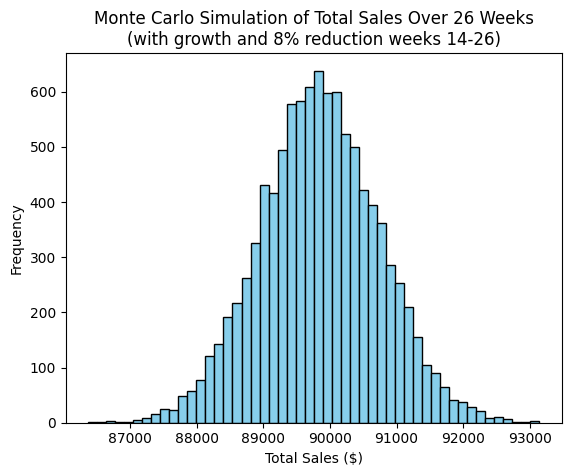

In [65]:
total_sales_simulated = []
simulated_sales_examples = []

for n,_ in enumerate(range(num_simulations)):
    simulated_sales = []
    for week in range(future_weeks):
        # Simulate base sales from normal distribution
        base_sales = np.random.normal(mean_weekly_sales, std_weekly_sales)
        base_sales = max(base_sales, 0)  # no negative sales
        
        # Apply weekly growth multiplier
        growth_multiplier = 1 + weekly_growth_rate * week
        
        # Apply reduction factor for weeks 14-26 (index 13 to 25 zero-based)
        if reduction_start_week - 1 <= week < reduction_start_week - 1 + reduction_weeks:
            reduction = reduction_factor
        else:
            reduction = 1.0
        
        # Final sales for the week
        week_sales = base_sales * growth_multiplier * reduction
        simulated_sales.append(week_sales)
        
    if n % 1000 == 0:
        simulated_sales_examples.append(simulated_sales)
    total_sales_simulated.append(np.sum(simulated_sales))

mean_sales_future = np.mean(total_sales_simulated)
median_sales_future = np.median(total_sales_simulated)
conf_interval_sales = np.percentile(total_sales_simulated, [5, 95])

print(f"Estimated total sales over {future_weeks} weeks (with 8% reduction weeks 14-26):")
print(f"Mean sales: ${mean_sales_future:,.2f}")
print(f"Median sales: ${median_sales_future:,.2f}")
print(f"90% confidence interval: ${conf_interval_sales[0]:,.2f} to ${conf_interval_sales[1]:,.2f}")

plt.hist(total_sales_simulated, bins=50, color='skyblue', edgecolor='black')
plt.title(f"Monte Carlo Simulation of Total Sales Over {future_weeks} Weeks\n(with growth and 8% reduction weeks 14-26)")
plt.xlabel("Total Sales ($)")
plt.ylabel("Frequency")
plt.show()


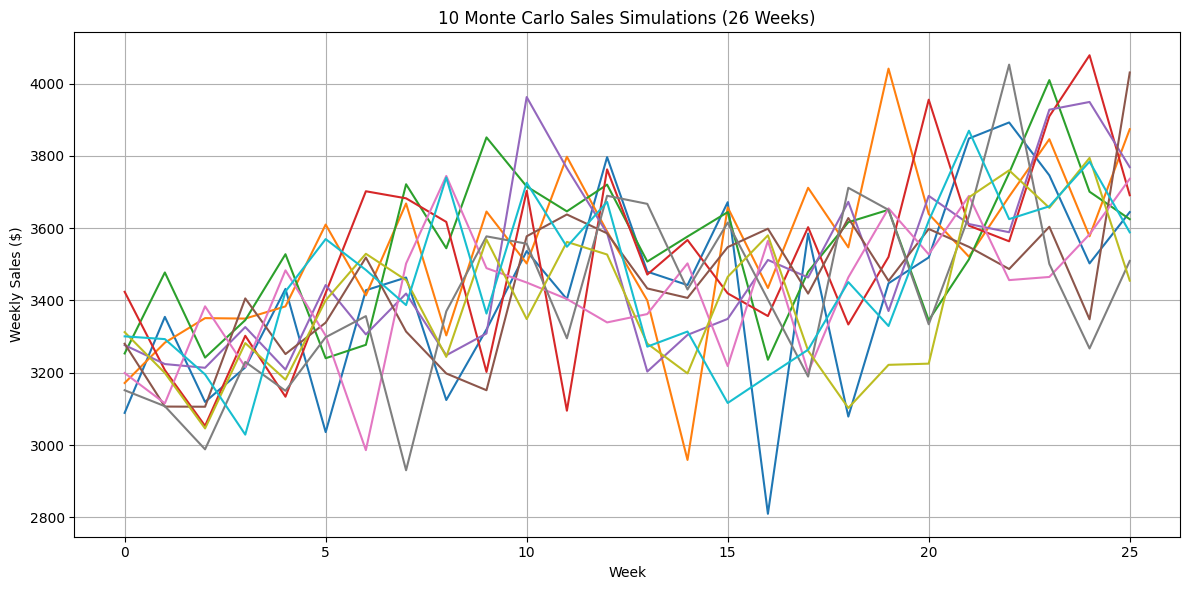

In [66]:
simulated_data = {'weeks':[week for week in range(future_weeks)]}

for n,example in enumerate(simulated_sales_examples):
    simulated_data[n] = example

simulated_df = pd.DataFrame(simulated_data)

plt.figure(figsize=(12, 6))

for line_number in range(1,11,1):
    sns.lineplot(data=simulated_df, x='weeks', y=simulated_df.iloc[:,line_number])
plt.title("10 Monte Carlo Sales Simulations (26 Weeks)")
plt.xlabel("Week")
plt.ylabel("Weekly Sales ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Multiple growth rates

Estimated total sales over 26 weeks (with 8% reduction weeks 14-26):
Mean sales: $88,416.11
Median sales: $88,420.55
90% confidence interval: $86,990.66 to $89,811.17


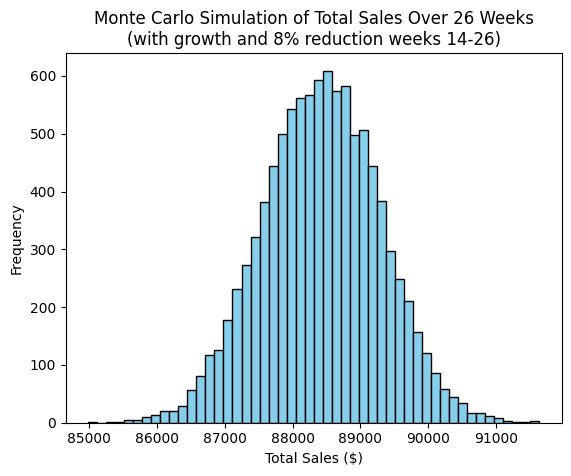

Estimated total sales over 26 weeks (with 8% reduction weeks 14-26):
Mean sales: $98,041.52
Median sales: $98,034.96
90% confidence interval: $96,489.59 to $99,619.17


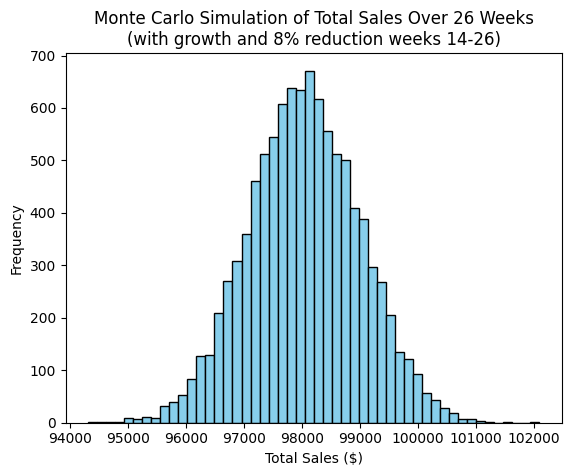

Estimated total sales over 26 weeks (with 8% reduction weeks 14-26):
Mean sales: $107,658.14
Median sales: $107,657.61
90% confidence interval: $105,899.69 to $109,426.74


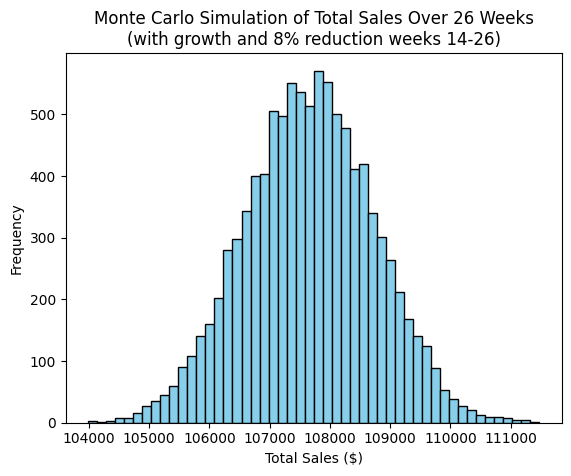

In [72]:
# total_sales_simulated = []
# simulated_sales_examples = []

for weekly_growth_rate in [.01,.02,.03]:
    total_sales_simulated = []
    simulated_sales_examples = []

    for n,_ in enumerate(range(num_simulations)):
        simulated_sales = []
        for week in range(future_weeks):
            # Simulate base sales from normal distribution
            base_sales = np.random.normal(mean_weekly_sales, std_weekly_sales)
            base_sales = max(base_sales, 0)  # no negative sales
            
            # Apply weekly growth multiplier
            growth_multiplier = 1 + weekly_growth_rate * week
            
            # Apply reduction factor for weeks 14-26 (index 13 to 25 zero-based)
            if reduction_start_week - 1 <= week < reduction_start_week - 1 + reduction_weeks:
                reduction = reduction_factor
            else:
                reduction = 1.0
            
            # Final sales for the week
            week_sales = base_sales * growth_multiplier * reduction
            simulated_sales.append(week_sales)
            
        if n % 1000 == 0:
            simulated_sales_examples.append(simulated_sales)

        total_sales_simulated.append(np.sum(simulated_sales))

    mean_sales_future = np.mean(total_sales_simulated)
    median_sales_future = np.median(total_sales_simulated)
    conf_interval_sales = np.percentile(total_sales_simulated, [5, 95])

    print(f"Estimated total sales over {future_weeks} weeks (with 8% reduction weeks 14-26):")
    print(f"Mean sales: ${mean_sales_future:,.2f}")
    print(f"Median sales: ${median_sales_future:,.2f}")
    print(f"90% confidence interval: ${conf_interval_sales[0]:,.2f} to ${conf_interval_sales[1]:,.2f}")

    plt.hist(total_sales_simulated, bins=50, color='skyblue', edgecolor='black')
    plt.title(f"Monte Carlo Simulation of Total Sales Over {future_weeks} Weeks\n(with growth and 8% reduction weeks 14-26)")
    plt.xlabel("Total Sales ($)")
    plt.ylabel("Frequency")
    plt.show()

    

Estimated total sales over 26 weeks (with 8% reduction weeks 14-26):
Mean sales: $90,806.15
Median sales: $90,806.80
90% confidence interval: $87,487.95 to $94,176.89


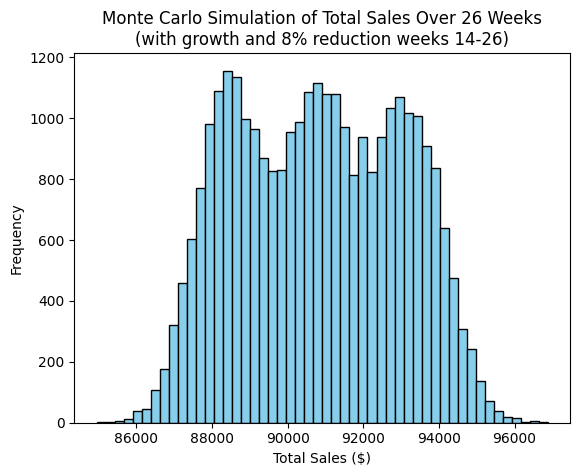

In [76]:
total_sales_simulated = []
simulated_sales_examples = []

for weekly_growth_rate in [.01,.0125,.015]:
    for n,_ in enumerate(range(num_simulations)):
        simulated_sales = []
        for week in range(future_weeks):
            # Simulate base sales from normal distribution
            base_sales = np.random.normal(mean_weekly_sales, std_weekly_sales)
            base_sales = max(base_sales, 0)  # no negative sales
            
            # Apply weekly growth multiplier
            growth_multiplier = 1 + weekly_growth_rate * week
            
            # Apply reduction factor for weeks 14-26 (index 13 to 25 zero-based)
            if reduction_start_week - 1 <= week < reduction_start_week - 1 + reduction_weeks:
                reduction = reduction_factor
            else:
                reduction = 1.0
            
            # Final sales for the week
            week_sales = base_sales * growth_multiplier * reduction
            simulated_sales.append(week_sales)
            
        if n % 1000 == 0:
            simulated_sales_examples.append(simulated_sales)

        total_sales_simulated.append(np.sum(simulated_sales))

mean_sales_future = np.mean(total_sales_simulated)
median_sales_future = np.median(total_sales_simulated)
conf_interval_sales = np.percentile(total_sales_simulated, [5, 95])

print(f"Estimated total sales over {future_weeks} weeks (with 8% reduction weeks 14-26):")
print(f"Mean sales: ${mean_sales_future:,.2f}")
print(f"Median sales: ${median_sales_future:,.2f}")
print(f"90% confidence interval: ${conf_interval_sales[0]:,.2f} to ${conf_interval_sales[1]:,.2f}")

plt.hist(total_sales_simulated, bins=50, color='skyblue', edgecolor='black')
plt.title(f"Monte Carlo Simulation of Total Sales Over {future_weeks} Weeks\n(with growth and 8% reduction weeks 14-26)")
plt.xlabel("Total Sales ($)")
plt.ylabel("Frequency")
plt.show()

    